# Feature extraction: Aspect Ratio, Echogenicity, Composition 

#### Micro-calicification is extracted by U-Net

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage import draw
from skimage.morphology import erosion

from feature_extractor import ThyroidFeature

In [2]:
image = cv2.imread('./data/P_TT-2271.png', cv2.IMREAD_GRAYSCALE)
mask = cv2.imread('./data/P_TT-2271_mask.png', cv2.IMREAD_GRAYSCALE)

thyroid_feature = ThyroidFeature('P_TT-2271', image, mask)

aspect ratio:  0.9010168554445298


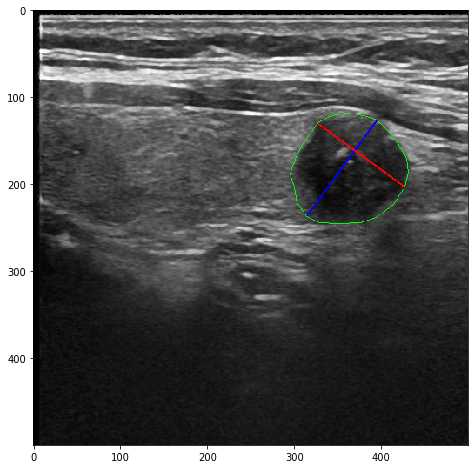

In [3]:
def plot_lesion_axis(image, mask, major_axis, minor_axis):
    plt.figure(figsize=(8,8))
    
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # add major/minor axis
    rr, cc, val = draw.line_aa(major_axis[1][0][0], major_axis[1][0][1], major_axis[1][1][0], major_axis[1][1][1])
    image[cc, rr, :] = [0, 0, 255]
    rr, cc, val = draw.line_aa(minor_axis[1][0][0], minor_axis[1][0][1], minor_axis[1][1][0], minor_axis[1][1][1])
    image[cc, rr, :] = [255, 0, 0]
    
    # Add contour
    contour = mask - erosion(mask)
    contour_coordinate = np.where(contour != 0)
    image[contour_coordinate] = [0, 255, 0]
    
    plt.imshow(image)

major_axis, minor_axis = thyroid_feature.get_lesion_axis()
plot_lesion_axis(thyroid_feature.image, thyroid_feature.mask, major_axis, minor_axis)
print('aspect ratio: ', thyroid_feature.compute_aspect_ratio())

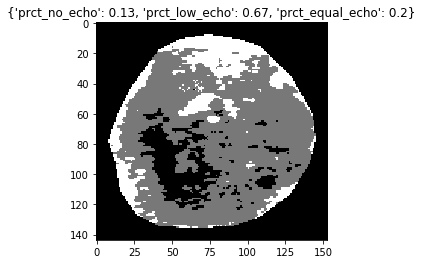

In [4]:
def plot_echo_image(echo_image, composition):
    plt.imshow(echo_image, cmap='gray')
    plt.title(str(composition))
    
echo_image, composition = thyroid_feature.compute_echo()
plot_echo_image(echo_image, composition)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Quality:  LesionQuality.Mixed_Solid


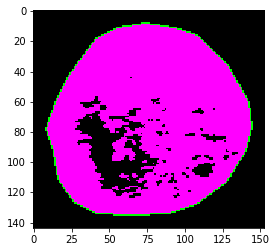

In [5]:
def plot_composition(echo_image, mask):
    composition = np.zeros([echo_image.shape[0], echo_image.shape[1],3])
    composition[np.where(echo_image > 1)] = [120,0,120]

    # Add contour
    contour = mask - erosion(mask)
    contour_coordinate = np.where(contour != 0)
    composition[contour_coordinate] = [0, 255, 0]
    
    plt.imshow(composition)
    
echo_image, _ = thyroid_feature.compute_echo()
plot_composition(echo_image, thyroid_feature.roi_mask)
print('Quality: ', thyroid_feature.analyze_quality())